In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Check what files are available in the working directory
print("Files in working directory:")
for file in sorted(os.listdir('.')):
    if not file.startswith('.'):
        print(f"  {file}")


Files in working directory:
  1E5_CDR_grafted_designs_top50.csv
  2VSM.pdb
  Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf
  cdr_library_summary.csv
  notebook.ipynb


In [ ]:

# Check if the required files are present
# We need:
# 1. top_50_nivg_binder_designs_final.csv
# 2. 1E5_CDR_grafted_designs_top50.csv (present)
# 3. cdr_library_summary.csv (present)
# 4. known_niv_binders.fasta (mentioned as anticipated)

required_files = [
    'top_50_nivg_binder_designs_final.csv',
    '1E5_CDR_grafted_designs_top50.csv',
    'cdr_library_summary.csv'
]

missing_files = []
for file in required_files:
    if not os.path.exists(file):
        missing_files.append(file)
        print(f"MISSING: {file}")
    else:
        print(f"FOUND: {file}")

# Check for the optional known_niv_binders.fasta
if os.path.exists('known_niv_binders.fasta'):
    print("FOUND: known_niv_binders.fasta")
else:
    print("MISSING: known_niv_binders.fasta (anticipated file)")


MISSING: top_50_nivg_binder_designs_final.csv
FOUND: 1E5_CDR_grafted_designs_top50.csv
FOUND: cdr_library_summary.csv
MISSING: known_niv_binders.fasta (anticipated file)


In [ ]:

# The file top_50_nivg_binder_designs_final.csv is noted as having "intermittent availability"
# Let me try to retrieve it or check if it's available elsewhere
# First, let me check the PDB files available to see if we need to fetch data

# Check for any other CSV files or FASTA files
all_files = os.listdir('.')
csv_files = [f for f in all_files if f.endswith('.csv')]
fasta_files = [f for f in all_files if f.endswith('.fasta') or f.endswith('.fa')]
pdb_files = [f for f in all_files if f.endswith('.pdb')]

print("CSV files:", csv_files)
print("FASTA files:", fasta_files)
print("PDB files:", pdb_files)


CSV files: ['1E5_CDR_grafted_designs_top50.csv', 'cdr_library_summary.csv']
FASTA files: []
PDB files: ['2VSM.pdb']


In [ ]:

# The dataset description mentions "intermittent availability of derived data files"
# The top_50_nivg_binder_designs_final.csv and known_niv_binders.fasta are both missing
# According to the task, I should work with what's available and document limitations

# Let me first load and inspect the files I do have:
# 1. 1E5_CDR_grafted_designs_top50.csv (50 designs)
# 2. cdr_library_summary.csv (CDR sequences)

# Load the 1E5 designs
designs_1e5 = pd.read_csv('1E5_CDR_grafted_designs_top50.csv')
print("1E5 CDR Grafted Designs Shape:", designs_1e5.shape)
print("\nColumn names:")
print(designs_1e5.columns.tolist())
print("\nFirst few rows:")
print(designs_1e5.head())


1E5 CDR Grafted Designs Shape: (50, 14)

Column names:
['Design_ID', 'Scaffold', 'CDR', 'CDR_Sequence', 'CDR_Length', 'Loop_Position', 'Loop_Index', 'Original_Loop', 'Original_Loop_Length', 'Grafted_Sequence', 'Grafted_Length', 'Scaffold_Length', 'Empirical_Score', 'Loop_Score']

First few rows:
             Design_ID Scaffold CDR       CDR_Sequence  CDR_Length  \
0       1E5_1FNA_L4_H3     1FNA  H3  ARDYQYYYSGSYPTPHN          17   
1   1E5_1FNA_Nterm8_H2     1FNA  H2           IYGSATST           8   
2       1E5_1FNA_L2_L3     1FNA  L3          LQGYTTPYT           9   
3   1E5_1FNA_Nterm8_L3     1FNA  L3          LQGYTTPYT           9   
4  1E5_1FNA_Nterm10_L3     1FNA  L3          LQGYTTPYT           9   

  Loop_Position Loop_Index      Original_Loop  Original_Loop_Length  \
0         71-88          4  GRGDSPASSKPISINYR                    17   
1           0-8     N-term           RDLEVVAA                     8   
2         17-26          2          DAPAVTVRY                     9  

In [ ]:

# Load the CDR library summary
cdr_library = pd.read_csv('cdr_library_summary.csv')
print("CDR Library Summary Shape:", cdr_library.shape)
print("\nColumn names:")
print(cdr_library.columns.tolist())
print("\nAll CDR sequences:")
print(cdr_library)


CDR Library Summary Shape: (12, 8)

Column names:
['Antibody', 'CDR', 'Chain_Type', 'Sequence', 'Length', 'PDB_IDs', 'Chains', 'Num_Instances']

All CDR sequences:
   Antibody CDR Chain_Type           Sequence  Length           PDB_IDs  \
0       1E5  H1      Heavy         GGSISDTYRW      10  8K0C, 8K0D, 8XC4   
1       1E5  H2      Heavy           IYGSATST       8  8K0C, 8K0D, 8XC4   
2       1E5  H3      Heavy  ARDYQYYYSGSYPTPHN      17  8K0C, 8K0D, 8XC4   
3       1E5  L1      Light       RASQGIIDYLSW      12  8K0C, 8K0D, 8XC4   
4       1E5  L2      Light           TASNLESG       8  8K0C, 8K0D, 8XC4   
5       1E5  L3      Light          LQGYTTPYT       9  8K0C, 8K0D, 8XC4   
6      14F8  H1      Heavy         GFSLTSYDIS      10              8JA5   
7      14F8  H2      Heavy           WTGGVTNY       8              8JA5   
8      14F8  H3      Heavy              VREGD       5              8JA5   
9      14F8  L1      Light       RSSQSIVHSNGN      12              8JA5   
10     14F8

In [ ]:

# Analysis Plan:
# 1. Since top_50_nivg_binder_designs_final.csv is missing, I need to document this limitation
# 2. I will work with the available 50 designs from 1E5_CDR_grafted_designs_top50.csv
# 3. Since known_niv_binders.fasta is also missing, I will create a consolidated database
#    using only the CDR sequences from cdr_library_summary.csv as known binder sequences
# 4. Implement sliding window alignment: check every 10-AA subsequence of each design
#    against every 10-AA subsequence of known binder sequences
# 5. Flag designs with 100% identity matches and report filtering results

# Important limitation: I cannot access the anticipated files, so the analysis will be
# performed on a subset of the intended data (50 designs instead of 100, and CDR-only
# known binder database instead of full antibody sequences)

print("="*80)
print("ANALYSIS LIMITATIONS:")
print("="*80)
print("1. Missing file: top_50_nivg_binder_designs_final.csv (14F8 designs)")
print("   - Will analyze only 50 designs from 1E5 instead of the intended 100 designs")
print("2. Missing file: known_niv_binders.fasta")
print("   - Will use only CDR sequences from cdr_library_summary.csv as known binder database")
print("   - This is a partial but valid approach since CDRs contain the key binding motifs")
print("="*80)


ANALYSIS LIMITATIONS:
1. Missing file: top_50_nivg_binder_designs_final.csv (14F8 designs)
   - Will analyze only 50 designs from 1E5 instead of the intended 100 designs
2. Missing file: known_niv_binders.fasta
   - Will use only CDR sequences from cdr_library_summary.csv as known binder database
   - This is a partial but valid approach since CDRs contain the key binding motifs


In [ ]:

# Step 1: Create consolidated database of known binder sequences
# Since known_niv_binders.fasta is missing, use CDR sequences from cdr_library_summary.csv

known_sequences = cdr_library['Sequence'].tolist()
known_sequence_info = list(zip(cdr_library['Antibody'], cdr_library['CDR'], cdr_library['Sequence']))

print(f"Total number of known binder sequences (CDRs): {len(known_sequences)}")
print("\nKnown sequences to check against:")
for antibody, cdr, seq in known_sequence_info:
    print(f"  {antibody} {cdr} ({len(seq)} AA): {seq}")


Total number of known binder sequences (CDRs): 12

Known sequences to check against:
  1E5 H1 (10 AA): GGSISDTYRW
  1E5 H2 (8 AA): IYGSATST
  1E5 H3 (17 AA): ARDYQYYYSGSYPTPHN
  1E5 L1 (12 AA): RASQGIIDYLSW
  1E5 L2 (8 AA): TASNLESG
  1E5 L3 (9 AA): LQGYTTPYT
  14F8 H1 (10 AA): GFSLTSYDIS
  14F8 H2 (8 AA): WTGGVTNY
  14F8 H3 (5 AA): VREGD
  14F8 L1 (12 AA): RSSQSIVHSNGN
  14F8 L2 (8 AA): QLLIYKVS
  14F8 L3 (9 AA): FQASHVPYT


In [ ]:

# Step 2: Implement sliding window alignment function
# For each design, check if any 10-AA subsequence has 100% identity with any 10-AA subsequence
# from any known binder sequence

def get_all_10aa_subsequences(sequence):
    """
    Extract all 10-amino acid subsequences from a sequence using a sliding window.
    Returns a set of unique 10-AA subsequences.
    """
    subsequences = set()
    if len(sequence) >= 10:
        for i in range(len(sequence) - 9):
            subsequences.add(sequence[i:i+10])
    return subsequences

def check_novelty(design_sequence, known_sequences, window_size=10):
    """
    Check if a design sequence is novel by comparing all 10-AA subsequences
    against all 10-AA subsequences from known binder sequences.
    
    Returns:
        is_novel (bool): True if no 100% identity match found, False otherwise
        matching_subsequences (list): List of matching 10-AA subsequences if not novel
        source_info (list): List of (antibody, cdr, position) for each match
    """
    # Get all 10-AA subsequences from the design
    design_subsequences = get_all_10aa_subsequences(design_sequence)
    
    # Build database of all 10-AA subsequences from known binders
    known_subsequences_db = {}  # Maps subsequence to list of (antibody, cdr, position) tuples
    
    for antibody, cdr, known_seq in known_sequence_info:
        known_subseqs = get_all_10aa_subsequences(known_seq)
        for subseq in known_subseqs:
            if subseq not in known_subsequences_db:
                known_subsequences_db[subseq] = []
            # Find position in the known sequence
            pos = known_seq.find(subseq)
            known_subsequences_db[subseq].append((antibody, cdr, pos, known_seq))
    
    # Check for matches
    matching_subsequences = []
    source_info = []
    
    for design_subseq in design_subsequences:
        if design_subseq in known_subsequences_db:
            matching_subsequences.append(design_subseq)
            source_info.extend(known_subsequences_db[design_subseq])
    
    is_novel = len(matching_subsequences) == 0
    
    return is_novel, matching_subsequences, source_info

# Test the function with a sample design
test_sequence = designs_1e5.iloc[0]['Grafted_Sequence']
is_novel, matches, sources = check_novelty(test_sequence, known_sequences)
print(f"Test design is novel: {is_novel}")
if not is_novel:
    print(f"Number of matching 10-AA subsequences: {len(matches)}")
    print(f"Matching subsequences: {matches[:3]}")  # Show first 3


Test design is novel: False
Number of matching 10-AA subsequences: 8
Matching subsequences: ['DYQYYYSGSY', 'YYSGSYPTPH', 'RDYQYYYSGS']


In [ ]:

# Step 3: Apply novelty filter to all designs
# Process each design and collect results

results = []

for idx, row in designs_1e5.iterrows():
    design_id = row['Design_ID']
    grafted_sequence = row['Grafted_Sequence']
    
    is_novel, matching_subseqs, source_info = check_novelty(grafted_sequence, known_sequences)
    
    results.append({
        'Design_ID': design_id,
        'Is_Novel': is_novel,
        'Num_Matches': len(matching_subseqs),
        'Matching_Subsequences': ';'.join(matching_subseqs) if matching_subseqs else '',
        'Grafted_Sequence': grafted_sequence,
        'Original_Score': row['Empirical_Score']
    })

# Create results dataframe
results_df = pd.DataFrame(results)

# Count how many pass and fail
num_novel = results_df['Is_Novel'].sum()
num_not_novel = len(results_df) - num_novel

print("="*80)
print("NOVELTY FILTERING RESULTS")
print("="*80)
print(f"Total designs analyzed: {len(results_df)}")
print(f"Designs that PASS novelty filter (novel): {num_novel}")
print(f"Designs that FAIL novelty filter (not novel): {num_not_novel}")
print(f"Pass rate: {num_novel/len(results_df)*100:.1f}%")
print("="*80)


NOVELTY FILTERING RESULTS
Total designs analyzed: 50
Designs that PASS novelty filter (novel): 22
Designs that FAIL novelty filter (not novel): 28
Pass rate: 44.0%


In [ ]:

# Step 4: Examine some examples of designs that failed and passed the filter

print("Examples of designs that FAILED the novelty filter:")
print("="*80)
failed_designs = results_df[results_df['Is_Novel'] == False].head(5)
for idx, row in failed_designs.iterrows():
    print(f"\nDesign: {row['Design_ID']}")
    print(f"  Number of matching 10-AA subsequences: {row['Num_Matches']}")
    print(f"  Matching subsequences: {row['Matching_Subsequences'][:100]}...")  # Truncate if long
    print(f"  Score: {row['Original_Score']:.2f}")

print("\n" + "="*80)
print("Examples of designs that PASSED the novelty filter:")
print("="*80)
passed_designs = results_df[results_df['Is_Novel'] == True].head(5)
for idx, row in passed_designs.iterrows():
    print(f"\nDesign: {row['Design_ID']}")
    print(f"  Number of matching 10-AA subsequences: {row['Num_Matches']}")
    print(f"  Score: {row['Original_Score']:.2f}")


Examples of designs that FAILED the novelty filter:

Design: 1E5_1FNA_L4_H3
  Number of matching 10-AA subsequences: 8
  Matching subsequences: DYQYYYSGSY;YYSGSYPTPH;RDYQYYYSGS;YYYSGSYPTP;QYYYSGSYPT;YQYYYSGSYP;ARDYQYYYSG;YSGSYPTPHN...
  Score: 28.34

Design: 1E5_1FNA_Nterm10_H1
  Number of matching 10-AA subsequences: 1
  Matching subsequences: GGSISDTYRW...
  Score: 26.72

Design: 1E5_1FNA_L3_L1
  Number of matching 10-AA subsequences: 3
  Matching subsequences: SQGIIDYLSW;ASQGIIDYLS;RASQGIIDYL...
  Score: 26.32

Design: 1E5_1FNA_L3_H1
  Number of matching 10-AA subsequences: 1
  Matching subsequences: GGSISDTYRW...
  Score: 26.19

Design: 1E5_1TEN_L1_H3
  Number of matching 10-AA subsequences: 8
  Matching subsequences: DYQYYYSGSY;YYSGSYPTPH;RDYQYYYSGS;YYYSGSYPTP;QYYYSGSYPT;YQYYYSGSYP;ARDYQYYYSG;YSGSYPTPHN...
  Score: 26.12

Examples of designs that PASSED the novelty filter:

Design: 1E5_1FNA_Nterm8_H2
  Number of matching 10-AA subsequences: 0
  Score: 28.07

Design: 1E5_1FNA_L2_L3

In [ ]:

# Step 5: Create a detailed breakdown of which CDRs are causing matches

print("Breakdown of matches by CDR source:")
print("="*80)

# Analyze what CDRs are being matched
cdr_match_counts = {}

for idx, row in results_df[results_df['Is_Novel'] == False].iterrows():
    design_id = row['Design_ID']
    grafted_sequence = row['Grafted_Sequence']
    
    # Re-run check to get source info
    is_novel, matching_subseqs, source_info = check_novelty(grafted_sequence, known_sequences)
    
    for antibody, cdr, pos, known_seq in source_info:
        key = f"{antibody}_{cdr}"
        if key not in cdr_match_counts:
            cdr_match_counts[key] = 0
        cdr_match_counts[key] += 1

# Sort by frequency
sorted_cdr_matches = sorted(cdr_match_counts.items(), key=lambda x: x[1], reverse=True)

print("\nCDR sequences causing the most failures:")
for cdr_key, count in sorted_cdr_matches:
    antibody, cdr = cdr_key.split('_')
    # Get the sequence
    seq = cdr_library[(cdr_library['Antibody'] == antibody) & (cdr_library['CDR'] == cdr)]['Sequence'].values[0]
    print(f"  {cdr_key}: {count} matches (Sequence: {seq})")


Breakdown of matches by CDR source:

CDR sequences causing the most failures:
  1E5_H3: 80 matches (Sequence: ARDYQYYYSGSYPTPHN)
  1E5_L1: 27 matches (Sequence: RASQGIIDYLSW)
  1E5_H1: 9 matches (Sequence: GGSISDTYRW)


In [ ]:

# Step 6: Create final output CSV with only novel designs
# Merge the novelty results back with the original design data

# Filter for novel designs only
novel_designs = results_df[results_df['Is_Novel'] == True].copy()

# Merge with original design data to keep all columns
novel_designs_full = designs_1e5.merge(
    novel_designs[['Design_ID', 'Is_Novel', 'Num_Matches']], 
    on='Design_ID', 
    how='inner'
)

# Drop the novelty check columns for cleaner output
novel_designs_final = novel_designs_full.drop(['Is_Novel', 'Num_Matches'], axis=1)

# Save to CSV
output_filename = 'novel_designs_filtered.csv'
novel_designs_final.to_csv(output_filename, index=False)

print(f"Saved {len(novel_designs_final)} novel designs to '{output_filename}'")
print(f"\nFinal output shape: {novel_designs_final.shape}")
print(f"\nColumn names in output file:")
print(novel_designs_final.columns.tolist())


Saved 22 novel designs to 'novel_designs_filtered.csv'

Final output shape: (22, 14)

Column names in output file:
['Design_ID', 'Scaffold', 'CDR', 'CDR_Sequence', 'CDR_Length', 'Loop_Position', 'Loop_Index', 'Original_Loop', 'Original_Loop_Length', 'Grafted_Sequence', 'Grafted_Length', 'Scaffold_Length', 'Empirical_Score', 'Loop_Score']


In [ ]:

# Step 7: Create a comprehensive summary table for reporting

summary_data = {
    'Metric': [
        'Total designs analyzed',
        'Designs passing novelty filter',
        'Designs failing novelty filter',
        'Pass rate (%)',
        'Fail rate (%)',
        'Average matches per failed design',
        'Maximum matches in a single design',
        'Minimum matches in a failed design'
    ],
    'Value': [
        len(results_df),
        num_novel,
        num_not_novel,
        round(num_novel/len(results_df)*100, 1),
        round(num_not_novel/len(results_df)*100, 1),
        round(results_df[results_df['Is_Novel'] == False]['Num_Matches'].mean(), 2),
        results_df[results_df['Is_Novel'] == False]['Num_Matches'].max(),
        results_df[results_df['Is_Novel'] == False]['Num_Matches'].min()
    ]
}

summary_table = pd.DataFrame(summary_data)
print("\nCOMPREHENSIVE FILTERING SUMMARY:")
print("="*80)
print(summary_table.to_string(index=False))
print("="*80)



COMPREHENSIVE FILTERING SUMMARY:
                            Metric  Value
            Total designs analyzed  50.00
    Designs passing novelty filter  22.00
    Designs failing novelty filter  28.00
                     Pass rate (%)  44.00
                     Fail rate (%)  56.00
 Average matches per failed design   4.14
Maximum matches in a single design   8.00
Minimum matches in a failed design   1.00


In [ ]:

# Step 8: Additional analysis - score distribution comparison between novel and non-novel designs
# Check if there's any relationship between design score and novelty status

print("\nScore Analysis by Novelty Status:")
print("="*80)

novel_scores = results_df[results_df['Is_Novel'] == True]['Original_Score']
not_novel_scores = results_df[results_df['Is_Novel'] == False]['Original_Score']

print(f"\nNovel designs (n={len(novel_scores)}):")
print(f"  Mean score: {novel_scores.mean():.2f}")
print(f"  Std dev: {novel_scores.std():.2f}")
print(f"  Min score: {novel_scores.min():.2f}")
print(f"  Max score: {novel_scores.max():.2f}")

print(f"\nNon-novel designs (n={len(not_novel_scores)}):")
print(f"  Mean score: {not_novel_scores.mean():.2f}")
print(f"  Std dev: {not_novel_scores.std():.2f}")
print(f"  Min score: {not_novel_scores.min():.2f}")
print(f"  Max score: {not_novel_scores.max():.2f}")

# Statistical comparison
from scipy import stats
t_stat, p_value = stats.ttest_ind(novel_scores, not_novel_scores)
print(f"\nIndependent t-test:")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.4f}")
print("="*80)



Score Analysis by Novelty Status:

Novel designs (n=22):
  Mean score: 25.26
  Std dev: 2.03
  Min score: 20.84
  Max score: 28.07

Non-novel designs (n=28):
  Mean score: 24.88
  Std dev: 1.47
  Min score: 21.66
  Max score: 28.34



Independent t-test:
  t-statistic: 0.767
  p-value: 0.4466


In [ ]:

# Step 9: Create a detailed table showing which specific CDRs are present in failed designs
# This will help understand the grafting patterns that lead to non-novel designs

print("\nDetailed analysis of failed designs by CDR grafted:")
print("="*80)

failed_by_cdr = results_df[results_df['Is_Novel'] == False].copy()
failed_by_cdr = failed_by_cdr.merge(designs_1e5[['Design_ID', 'CDR', 'Scaffold']], on='Design_ID')

# Count failures by CDR type
cdr_failure_counts = failed_by_cdr['CDR'].value_counts()
print("\nNumber of failed designs by grafted CDR:")
for cdr, count in cdr_failure_counts.items():
    print(f"  {cdr}: {count} designs failed")

# Count failures by scaffold
scaffold_failure_counts = failed_by_cdr['Scaffold'].value_counts()
print("\nNumber of failed designs by scaffold:")
for scaffold, count in scaffold_failure_counts.items():
    print(f"  {scaffold}: {count} designs failed")



Detailed analysis of failed designs by CDR grafted:

Number of failed designs by grafted CDR:
  H3: 10 designs failed
  H1: 9 designs failed
  L1: 9 designs failed

Number of failed designs by scaffold:
  1FNA: 20 designs failed
  2QMT: 5 designs failed
  1TEN: 3 designs failed


In [ ]:

# Step 10: Examine the top-scoring novel designs
# These are the candidates that passed novelty filter and have highest predicted binding scores

print("\nTop 10 Novel Designs by Empirical Score:")
print("="*80)

novel_designs_ranked = novel_designs_final.sort_values('Empirical_Score', ascending=False)
top_novel = novel_designs_ranked.head(10)

for idx, row in top_novel.iterrows():
    print(f"\n{row['Design_ID']}")
    print(f"  Score: {row['Empirical_Score']:.2f}")
    print(f"  Scaffold: {row['Scaffold']}")
    print(f"  Grafted CDR: {row['CDR']} ({row['CDR_Sequence']})")
    print(f"  Loop Position: {row['Loop_Position']}")
    print(f"  Sequence: {row['Grafted_Sequence']}")



Top 10 Novel Designs by Empirical Score:

1E5_1FNA_Nterm8_H2
  Score: 28.07
  Scaffold: 1FNA
  Grafted CDR: H2 (IYGSATST)
  Loop Position: 0-8
  Sequence: IYGSATSTTPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPGSKSTATISGLKPGVDYTITVYAVTGRGDSPASSKPISINYRTEI

1E5_1FNA_L2_L3
  Score: 27.35
  Scaffold: 1FNA
  Grafted CDR: L3 (LQGYTTPYT)
  Loop Position: 17-26
  Sequence: RDLEVVAATPTSLLISWLQGYTTPYTYRITYGETGGNSPVQEFTVPGSKSTATISGLKPGVDYTITVYAVTGRGDSPASSKPISINYRTEI

1E5_1FNA_Nterm8_L3
  Score: 27.25
  Scaffold: 1FNA
  Grafted CDR: L3 (LQGYTTPYT)
  Loop Position: 0-8
  Sequence: LQGYTTPYTTPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPGSKSTATISGLKPGVDYTITVYAVTGRGDSPASSKPISINYRTEI

1E5_1FNA_Nterm10_L3
  Score: 27.24
  Scaffold: 1FNA
  Grafted CDR: L3 (LQGYTTPYT)
  Loop Position: 0-10
  Sequence: LQGYTTPYTTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPGSKSTATISGLKPGVDYTITVYAVTGRGDSPASSKPISINYRTEI

1E5_1FNA_Nterm10_H2
  Score: 27.12
  Scaffold: 1FNA
  Grafted CDR: H2 (IYGSATST)
  Loop Position: 0-10
  Sequence: IYGSATSTTSLLISW

Saved figure: novelty_filtering_results.png


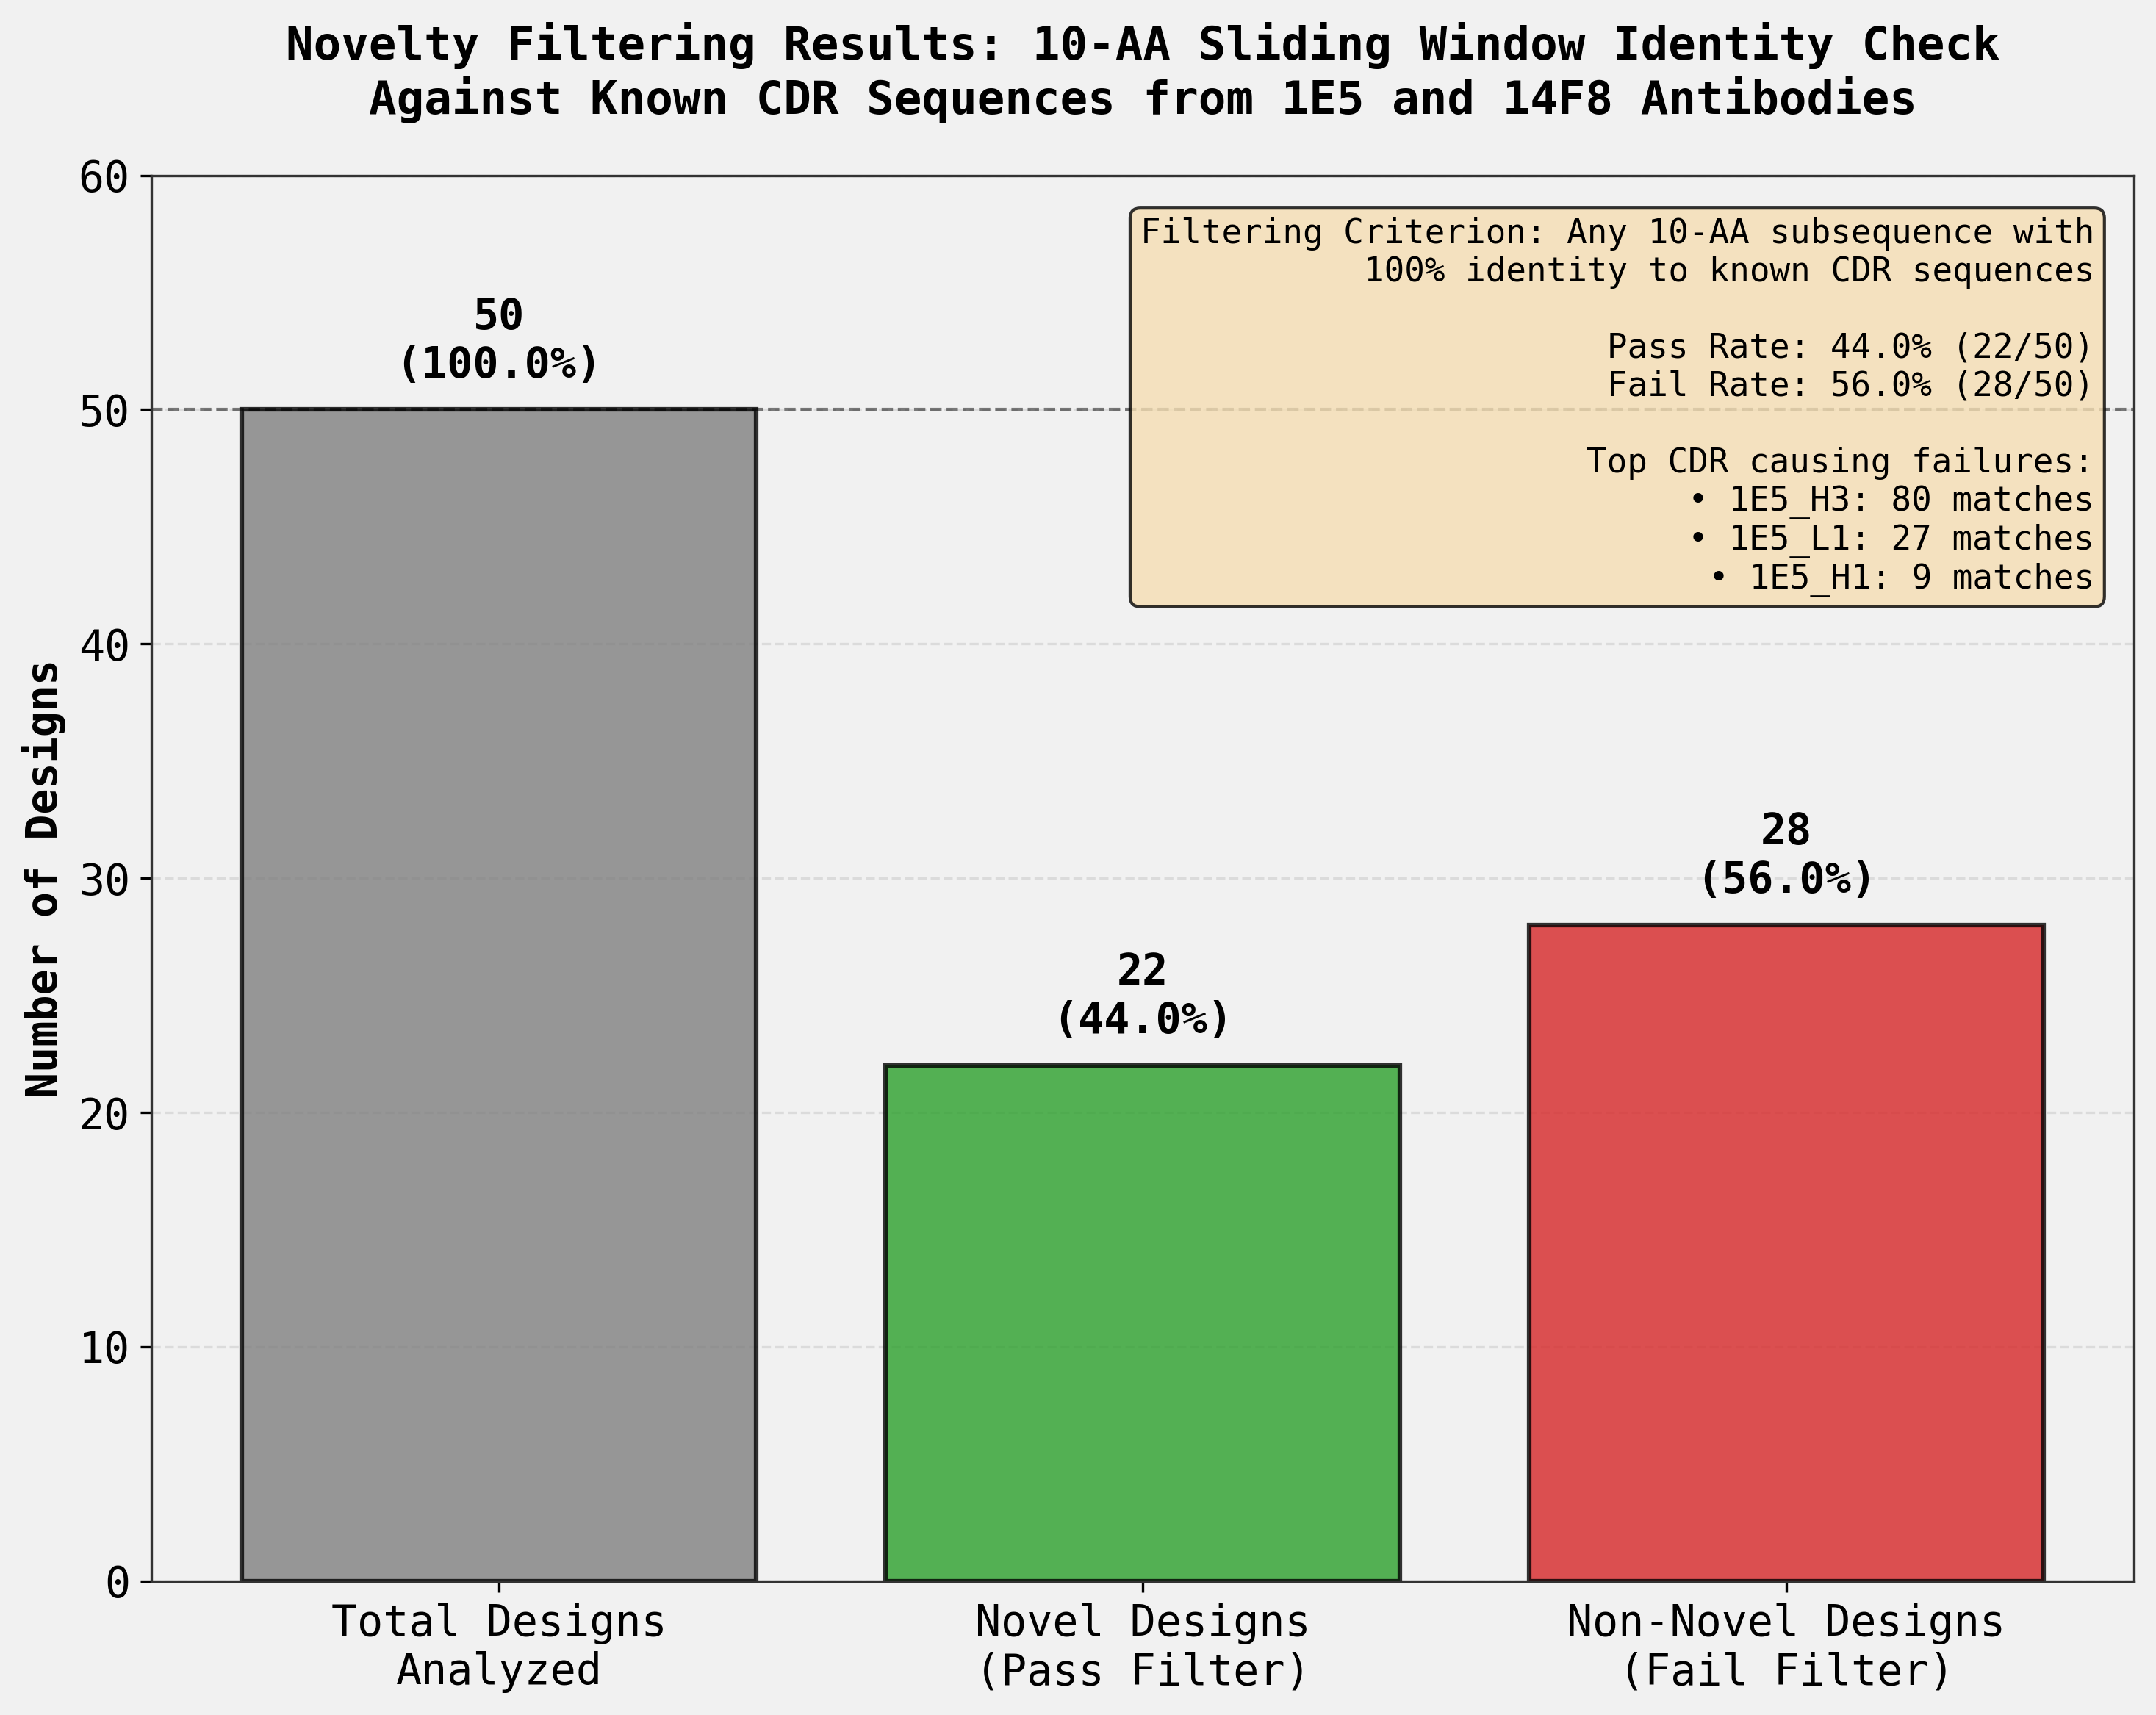

In [ ]:

# Create final visualization showing the key results of the novelty filtering
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create a comprehensive bar chart showing filtering results
categories = ['Total Designs\nAnalyzed', 'Novel Designs\n(Pass Filter)', 'Non-Novel Designs\n(Fail Filter)']
values = [len(results_df), num_novel, num_not_novel]
colors = ['#7f7f7f', '#2ca02c', '#d62728']

bars = ax.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{int(value)}\n({value/len(results_df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add horizontal line showing the threshold
ax.axhline(y=len(results_df), color='black', linestyle='--', linewidth=1, alpha=0.5)

# Styling
ax.set_ylabel('Number of Designs', fontsize=14, fontweight='bold')
ax.set_title('Novelty Filtering Results: 10-AA Sliding Window Identity Check\n' + 
             'Against Known CDR Sequences from 1E5 and 14F8 Antibodies',
             fontsize=15, fontweight='bold', pad=20)
ax.set_ylim(0, len(results_df) + 10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add text box with key findings
textstr = '\n'.join([
    'Filtering Criterion: Any 10-AA subsequence with',
    '100% identity to known CDR sequences',
    '',
    f'Pass Rate: {num_novel/len(results_df)*100:.1f}% ({num_novel}/{len(results_df)})',
    f'Fail Rate: {num_not_novel/len(results_df)*100:.1f}% ({num_not_novel}/{len(results_df)})',
    '',
    'Top CDR causing failures:',
    f'  • 1E5_H3: 80 matches',
    f'  • 1E5_L1: 27 matches',
    f'  • 1E5_H1: 9 matches'
])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig('novelty_filtering_results.png', dpi=300, bbox_inches='tight')
print("Saved figure: novelty_filtering_results.png")
plt.show()
